# Bài tập cuối kỳ môn Machine Learning: Dự đoán xem một nhân viên sẽ nghỉ việc hay không

## Thư viện

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split

## Define các hàm để in ra sự so sánh (nếu có)

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def compare_classifiers(X_train, y_train, X_test, y_test, classifiers):
    """
    Compare multiple classifiers using multiple evaluation metrics and display the results in a vertical bar chart.

    Args:
        X_train (array-like): Training features.
        y_train (array-like): Training labels.
        X_test (array-like): Test features.
        y_test (array-like): Test labels.
        classifiers (dict): Dictionary of classifiers with their names as keys.

    Returns:
        None
    """
    # Dictionary to store evaluation metric scores
    scores = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

    # Iterate over the classifiers
    for name, clf in classifiers.items():
        clf.fit(X_train, y_train)  # Train the classifier
        y_pred = clf.predict(X_test)  # Make predictions on the test set

        # Calculate evaluation metric scores
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Store scores in the dictionary
        scores['Accuracy'].append(accuracy)
        scores['Precision'].append(precision)
        scores['Recall'].append(recall)
        scores['F1-Score'].append(f1)

    # Create a DataFrame to store the scores
    df = pd.DataFrame(scores, index=classifiers.keys())

    # Customize the plot style
    plt.style.use('ggplot')

    # Plot the vertical bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    df.plot(kind='bar', ax=ax, width=0.8)

    # Set the title and axes labels
    ax.set_title('Comparison of Classifier Performance')
    ax.set_xlabel('Classifier')
    ax.set_ylabel('Score')

    # Add the score values as text annotations
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() / 2, i.get_height() + 0.01, str(round(i.get_height(), 3)), ha='center', fontsize=10)

    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Set the y-axis limit to provide some padding
    plt.ylim(top=df.max().max() + 0.1)

    # Show the chart
    plt.show()

## Phần 1 + Phần 4: Data Exploration + Data Preprocessing + Using Feature Selection for Reducing Overfitting

### Data cleaning

In [33]:
df = pd.DataFrame(pd.read_csv('Employee.csv'))
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [34]:
df.isna().sum()

# Không có giá trị null trong tập dữ liệu nên không cần xử lý "Missing Values"

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [35]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

# Xử lý dữ liệu trùng lặp.

### Data handling Categorical và Transformation


In [36]:
df['Education'].unique()


array(['Bachelors', 'Masters', 'PHD'], dtype=object)

In [37]:
df['City'].unique()

array(['Bangalore', 'Pune', 'New Delhi'], dtype=object)

In [38]:
# Có 3 features thuộc dạng categorical nên cần phải chuyển đổi

df_dummies = pd.get_dummies(df, columns=['JoiningYear', 'Education', 'City'])
df_dummies

,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,JoiningYear_2012,JoiningYear_2013,JoiningYear_2014,JoiningYear_2015,JoiningYear_2016,JoiningYear_2017,JoiningYear_2018,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune
0,3,34,Male,No,0,0,False,False,False,False,False,True,False,True,False,False,True,False,False
1,1,28,Female,No,3,1,False,True,False,False,False,False,False,True,False,False,False,False,True
2,3,38,Female,No,2,0,False,False,True,False,False,False,False,True,False,False,False,True,False
3,3,27,Male,No,5,1,False,False,False,False,True,False,False,False,True,False,True,False,False
4,3,24,Male,Yes,2,1,False,False,False,False,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4645,2,31,Female,No,2,0,False,False,False,False,False,True,False,False,True,False,False,False,True
4647,3,30,Male,No,2,0,False,False,False,False,True,False,False,True,False,False,False,False,True
4649,2,37,Male,No,2,1,False,True,False,False,False,False,False,False,True,False,False,False,True
4650,3,27,Male,No,5,1,False,False,False,False,False,False,True,False,True,False,False,True,False


In [39]:
df_dummies.dtypes

PaymentTier                   int64
Age                           int64
Gender                       object
EverBenched                  object
ExperienceInCurrentDomain     int64
LeaveOrNot                    int64
JoiningYear_2012               bool
JoiningYear_2013               bool
JoiningYear_2014               bool
JoiningYear_2015               bool
JoiningYear_2016               bool
JoiningYear_2017               bool
JoiningYear_2018               bool
Education_Bachelors            bool
Education_Masters              bool
Education_PHD                  bool
City_Bangalore                 bool
City_New Delhi                 bool
City_Pune                      bool
dtype: object

In [40]:
le = LabelEncoder()

name = list(df_dummies.columns)
type = df_dummies.dtypes

for i in range(len(type)):
    if type[i] == 'object' or type[i] == 'bool':
        le.fit_transform(df_dummies[name[i]])
        df_dummies[name[i]] = le.transform(df_dummies[name[i]])
        
df_dummies

C:\Users\tqbao\AppData\Local\Temp\ipykernel_15128\2166870924.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if type[i] == 'object' or type[i] == 'bool':
C:\Users\tqbao\AppData\Local\Temp\ipykernel_15128\2166870924.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if type[i] == 'object' or type[i] == 'bool':
C:\Users\tqbao\AppData\Local\Temp\ipykernel_15128\2166870924.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if type

,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,JoiningYear_2012,JoiningYear_2013,JoiningYear_2014,JoiningYear_2015,JoiningYear_2016,JoiningYear_2017,JoiningYear_2018,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune
0,3,34,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
1,1,28,0,0,3,1,0,1,0,0,0,0,0,1,0,0,0,0,1
2,3,38,0,0,2,0,0,0,1,0,0,0,0,1,0,0,0,1,0
3,3,27,1,0,5,1,0,0,0,0,1,0,0,0,1,0,1,0,0
4,3,24,1,1,2,1,0,0,0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4645,2,31,0,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,1
4647,3,30,1,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4649,2,37,1,0,2,1,0,1,0,0,0,0,0,0,1,0,0,0,1
4650,3,27,1,0,5,1,0,0,0,0,0,0,1,0,1,0,0,1,0


### Data Exploration

array([[<Axes: title={'center': 'PaymentTier'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'EverBenched'}>],
       [<Axes: title={'center': 'ExperienceInCurrentDomain'}>,
        <Axes: title={'center': 'LeaveOrNot'}>,
        <Axes: title={'center': 'JoiningYear_2012'}>,
        <Axes: title={'center': 'JoiningYear_2013'}>],
       [<Axes: title={'center': 'JoiningYear_2014'}>,
        <Axes: title={'center': 'JoiningYear_2015'}>,
        <Axes: title={'center': 'JoiningYear_2016'}>,
        <Axes: title={'center': 'JoiningYear_2017'}>],
       [<Axes: title={'center': 'JoiningYear_2018'}>,
        <Axes: title={'center': 'Education_Bachelors'}>,
        <Axes: title={'center': 'Education_Masters'}>,
        <Axes: title={'center': 'Education_PHD'}>],
       [<Axes: title={'center': 'City_Bangalore'}>,
        <Axes: title={'center': 'City_New Delhi'}>,
        <Axes: title={'center': 'City_Pune'}>, <Axes: >]]

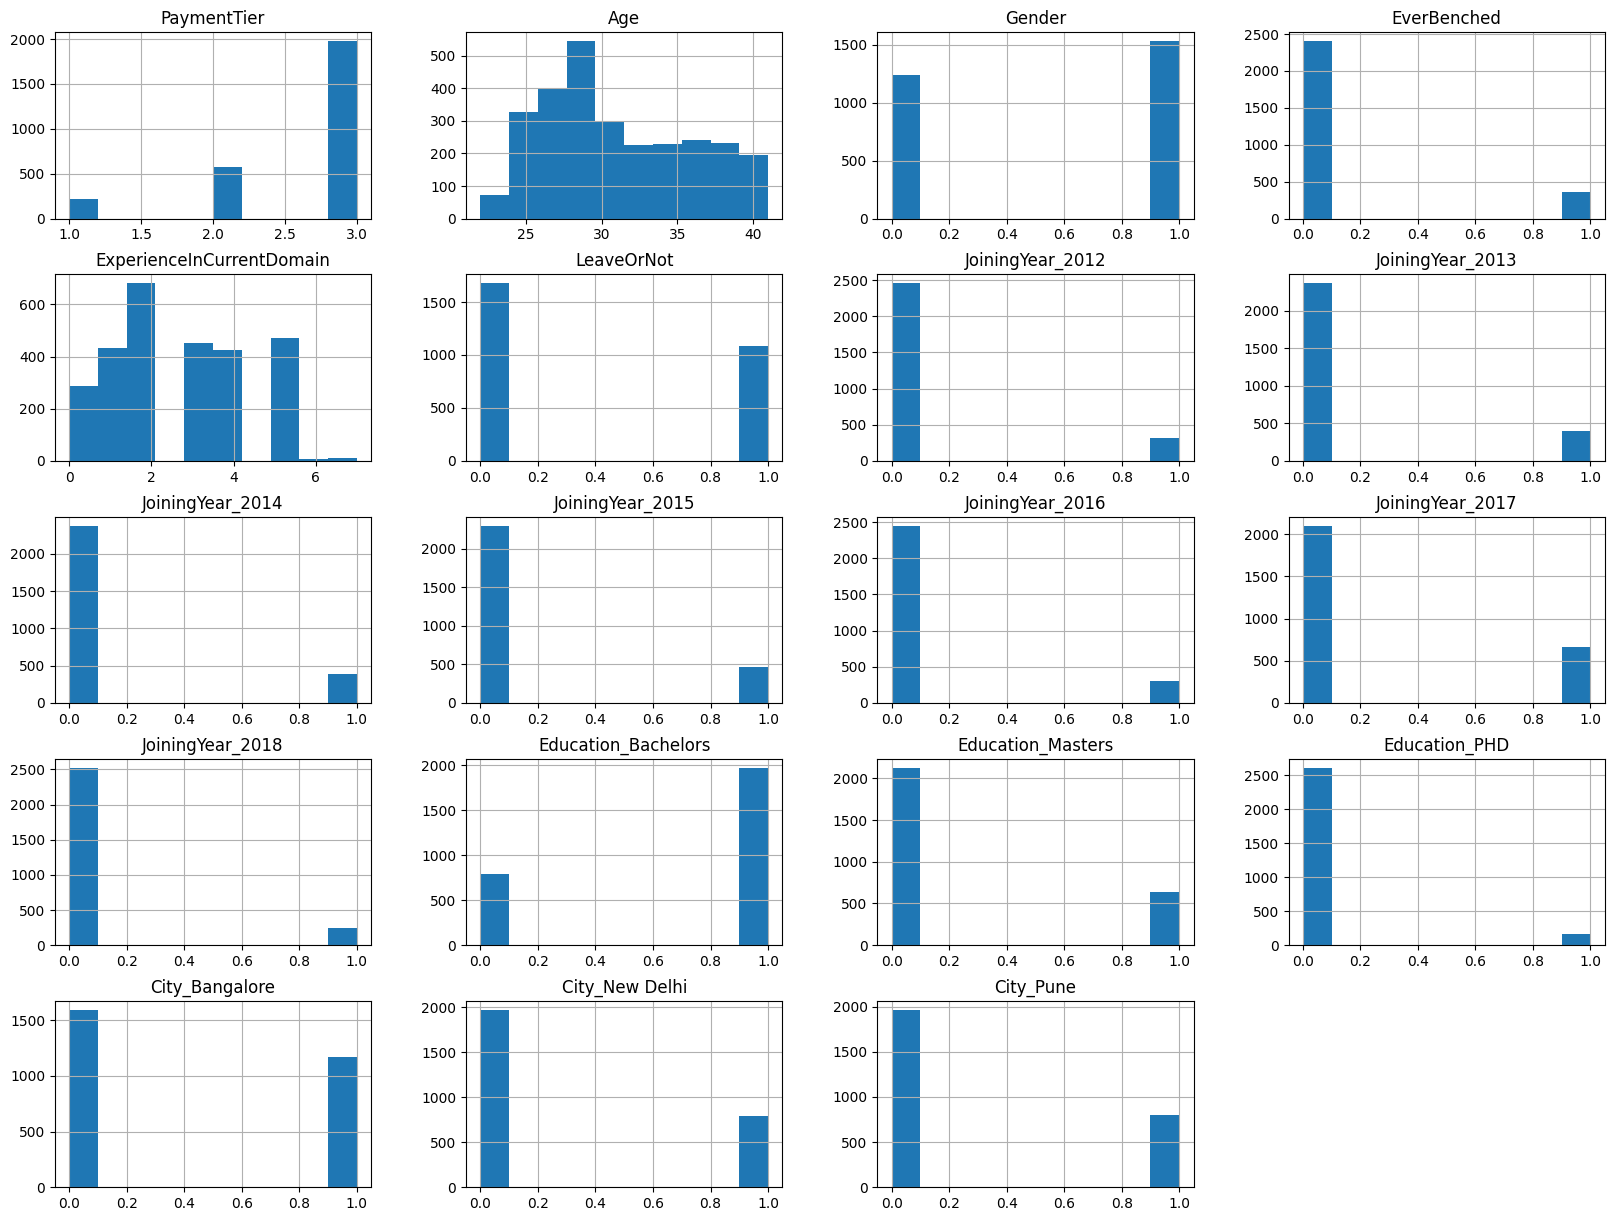

In [41]:
df_dummies.hist(figsize=(20, 15))

C:\Users\tqbao\AppData\Local\Temp\ipykernel_15128\845636304.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
C:\Users\tqbao\AppData\Local\Temp\ipykernel_15128\845636304.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
C:\Users\tqbao\AppData\Local\Temp\ipykernel_15128\845636304.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

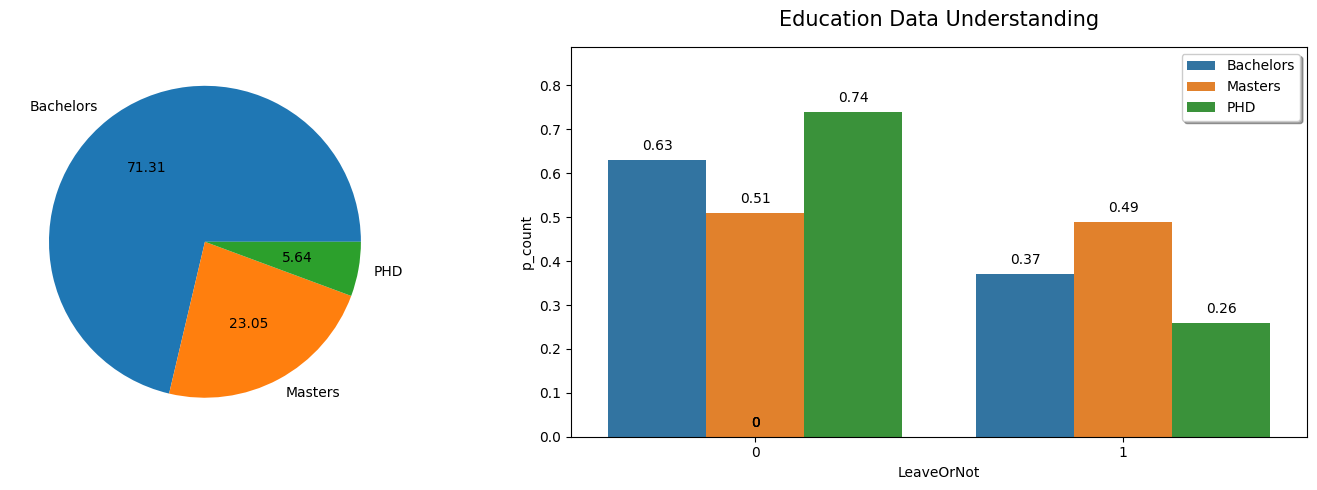

In [42]:
# xem tỉ lê số lượng nhân viên bỏ việc dựa trên trình độ học vấn

data1=df.Education.value_counts().reset_index()
data2=df.groupby(['Education','LeaveOrNot']).size().reset_index().rename(columns={0:'count'})
data2_=[]
for x in data2.Education.unique():
    msg=data2[data2.Education==x]
    msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
    data2_.append(msg)
data2=pd.concat(data2_)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].pie(data1['count'], labels=data1['Education'], autopct='%.2f')
ax[1].set_title('Education Data Understanding', fontsize=15, pad=15)

# Bar plot 
bar_plot = sns.barplot(data=data2, x='LeaveOrNot', y='p_count', hue='Education', ax=ax[1])

# Show the annotate on the top of barplot
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax[1].legend(shadow=True)
ax[1].set_ylim(ymin=0, ymax=data2['p_count'].max() + (data2['p_count'].max()*0.2))

plt.tight_layout()
plt.show()

C:\Users\tqbao\AppData\Local\Temp\ipykernel_15128\846651779.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
C:\Users\tqbao\AppData\Local\Temp\ipykernel_15128\846651779.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
C:\Users\tqbao\AppData\Local\Temp\ipykernel_15128\846651779.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

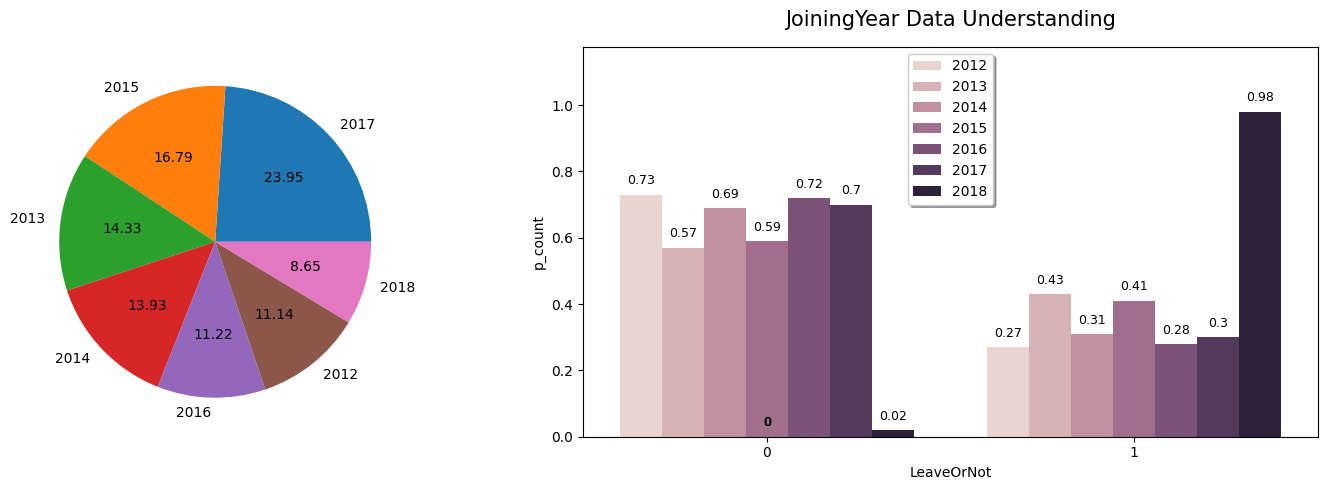

In [43]:
# xem tỉ lê số lượng nhân viên bỏ việc dựa trên năm ứng tuyển

data1=df.JoiningYear.value_counts().reset_index()
data2=df.groupby(['JoiningYear','LeaveOrNot']).size().reset_index().rename(columns={0:'count'})
data2_=[]
for x in data2.JoiningYear.unique():
    msg=data2[data2.JoiningYear==x]
    msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
    data2_.append(msg)
data2=pd.concat(data2_)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].pie(data1['count'], labels=data1['JoiningYear'], autopct='%.2f')
ax[1].set_title('JoiningYear Data Understanding', fontsize=15, pad=15)

# Bar plot 
bar_plot = sns.barplot(data=data2, x='LeaveOrNot', y='p_count', hue='JoiningYear', ax=ax[1])

# Show the annotate on the top of barplot
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=9)

ax[1].legend(shadow=True)
ax[1].set_ylim(ymin=0, ymax=data2['p_count'].max() + (data2['p_count'].max()*0.2))

plt.tight_layout()
plt.show()

C:\Users\tqbao\AppData\Local\Temp\ipykernel_15128\1945259697.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
C:\Users\tqbao\AppData\Local\Temp\ipykernel_15128\1945259697.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
C:\Users\tqbao\AppData\Local\Temp\ipykernel_15128\1945259697.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

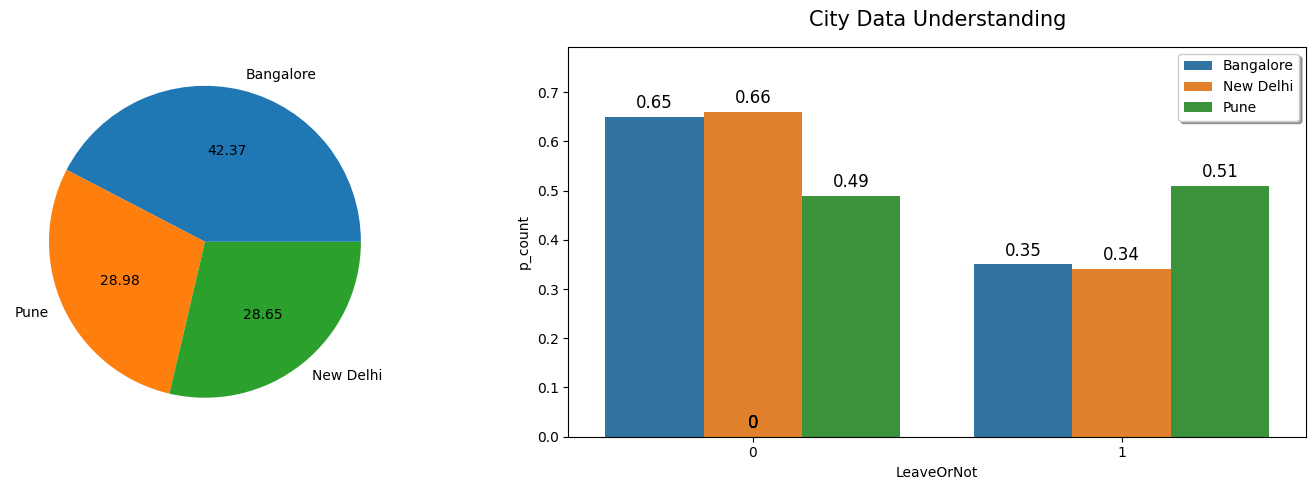

In [44]:
# xem tỉ lê số lượng nhân viên bỏ việc dựa trên thành phố sinh sống

data1=df.City.value_counts().reset_index()
data2=df.groupby(['City','LeaveOrNot']).size().reset_index().rename(columns={0:'count'})
data2_=[]
for x in data2.City.unique():
    msg=data2[data2.City==x]
    msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
    data2_.append(msg)
data2=pd.concat(data2_)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].pie(data1['count'], labels=data1['City'], autopct='%.2f')
ax[1].set_title('City Data Understanding', fontsize=15, pad=15)

# Bar plot 
bar_plot = sns.barplot(data=data2, x='LeaveOrNot', y='p_count', hue='City', ax=ax[1])

# Show the annotate on the top of barplot
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

ax[1].legend(shadow=True)
ax[1].set_ylim(ymin=0, ymax=data2['p_count'].max() + (data2['p_count'].max()*0.2))

plt.tight_layout()
plt.show()

C:\Users\tqbao\AppData\Local\Temp\ipykernel_15128\2770285513.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
C:\Users\tqbao\AppData\Local\Temp\ipykernel_15128\2770285513.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)


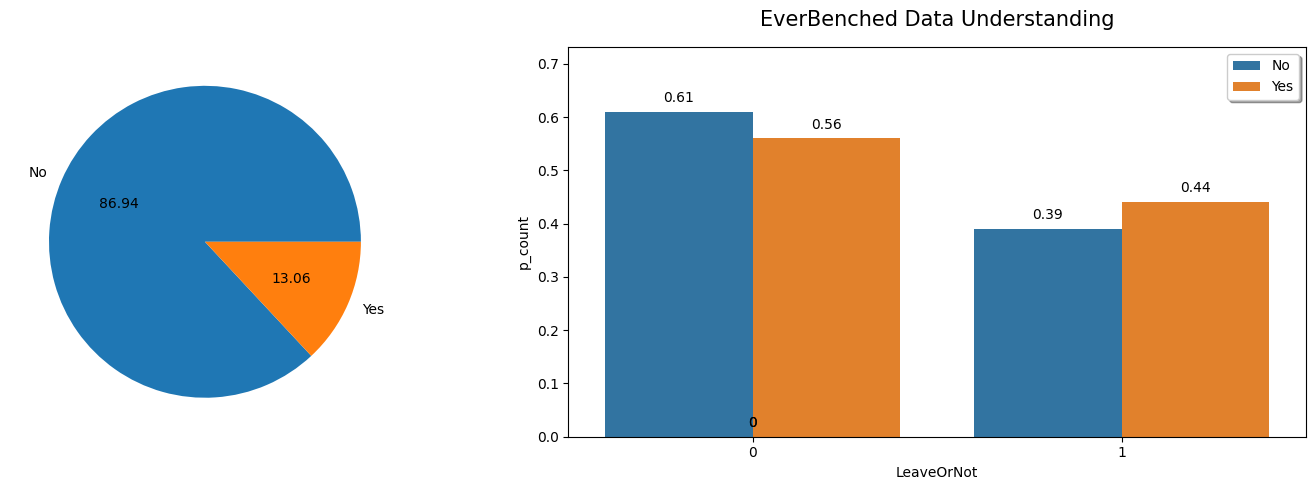

In [45]:
# xem tỉ lê số lượng nhân viên bỏ việc dựa trên lịch sử thăng cấp

data1=df.EverBenched.value_counts().reset_index()
data2=df.groupby(['EverBenched','LeaveOrNot']).size().reset_index().rename(columns={0:'count'})
data2_=[]
for x in data2.EverBenched.unique():
    msg=data2[data2.EverBenched==x]
    msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
    data2_.append(msg)
data2=pd.concat(data2_)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].pie(data1['count'], labels=data1['EverBenched'], autopct='%.2f')
ax[1].set_title('EverBenched Data Understanding', fontsize=15, pad=15)

# Bar plot 
bar_plot = sns.barplot(data=data2, x='LeaveOrNot', y='p_count', hue='EverBenched', ax=ax[1])

# Show the annotate on the top of barplot
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax[1].legend(shadow=True)
ax[1].set_ylim(ymin=0, ymax=data2['p_count'].max() + (data2['p_count'].max()*0.2))

plt.tight_layout()
plt.show()

C:\Users\tqbao\AppData\Local\Temp\ipykernel_15128\3754372727.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
C:\Users\tqbao\AppData\Local\Temp\ipykernel_15128\3754372727.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)


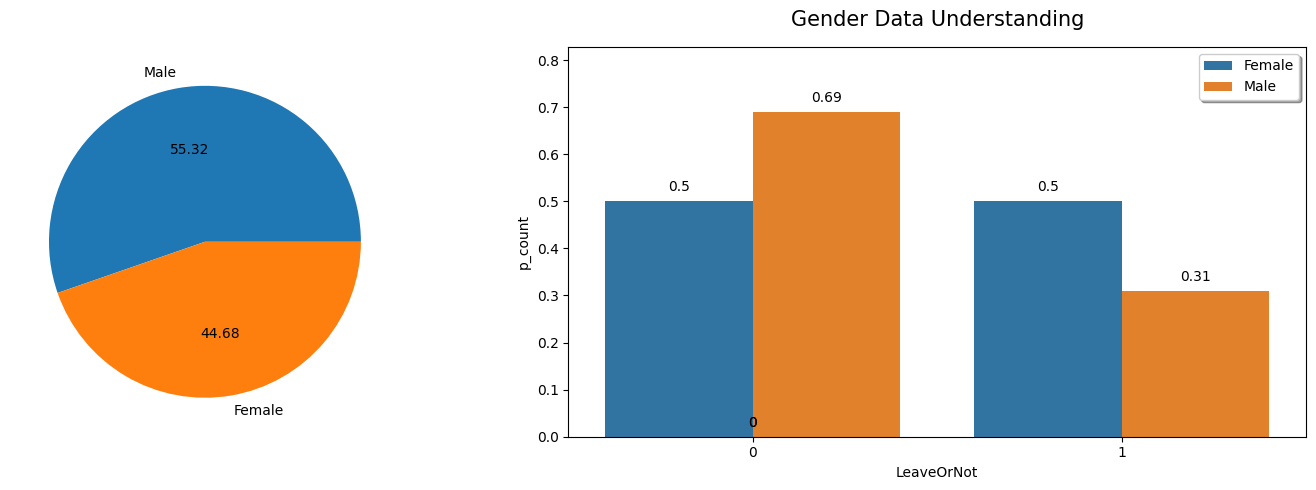

In [46]:
# xem tỉ lê số lượng nhân viên bỏ việc dựa trên giới tính

data1=df.Gender.value_counts().reset_index()
data2=df.groupby(['Gender','LeaveOrNot']).size().reset_index().rename(columns={0:'count'})
data2_=[]
for x in data2.Gender.unique():
    msg=data2[data2.Gender==x]
    msg['p_count']=np.round(msg['count']/msg['count'].sum(), 2)
    data2_.append(msg)
data2=pd.concat(data2_)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].pie(data1['count'], labels=data1['Gender'], autopct='%.2f')
ax[1].set_title('Gender Data Understanding', fontsize=15, pad=15)

# Bar plot 
bar_plot = sns.barplot(data=data2, x='LeaveOrNot', y='p_count', hue='Gender', ax=ax[1])

# Show the annotate on the top of barplot
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points')

ax[1].legend(shadow=True)
ax[1].set_ylim(ymin=0, ymax=data2['p_count'].max() + (data2['p_count'].max()*0.2))

plt.tight_layout()
plt.show()

### Sử dụng Pearson Corelation để xem điểm tương quang giữa các Feature

<Axes: >

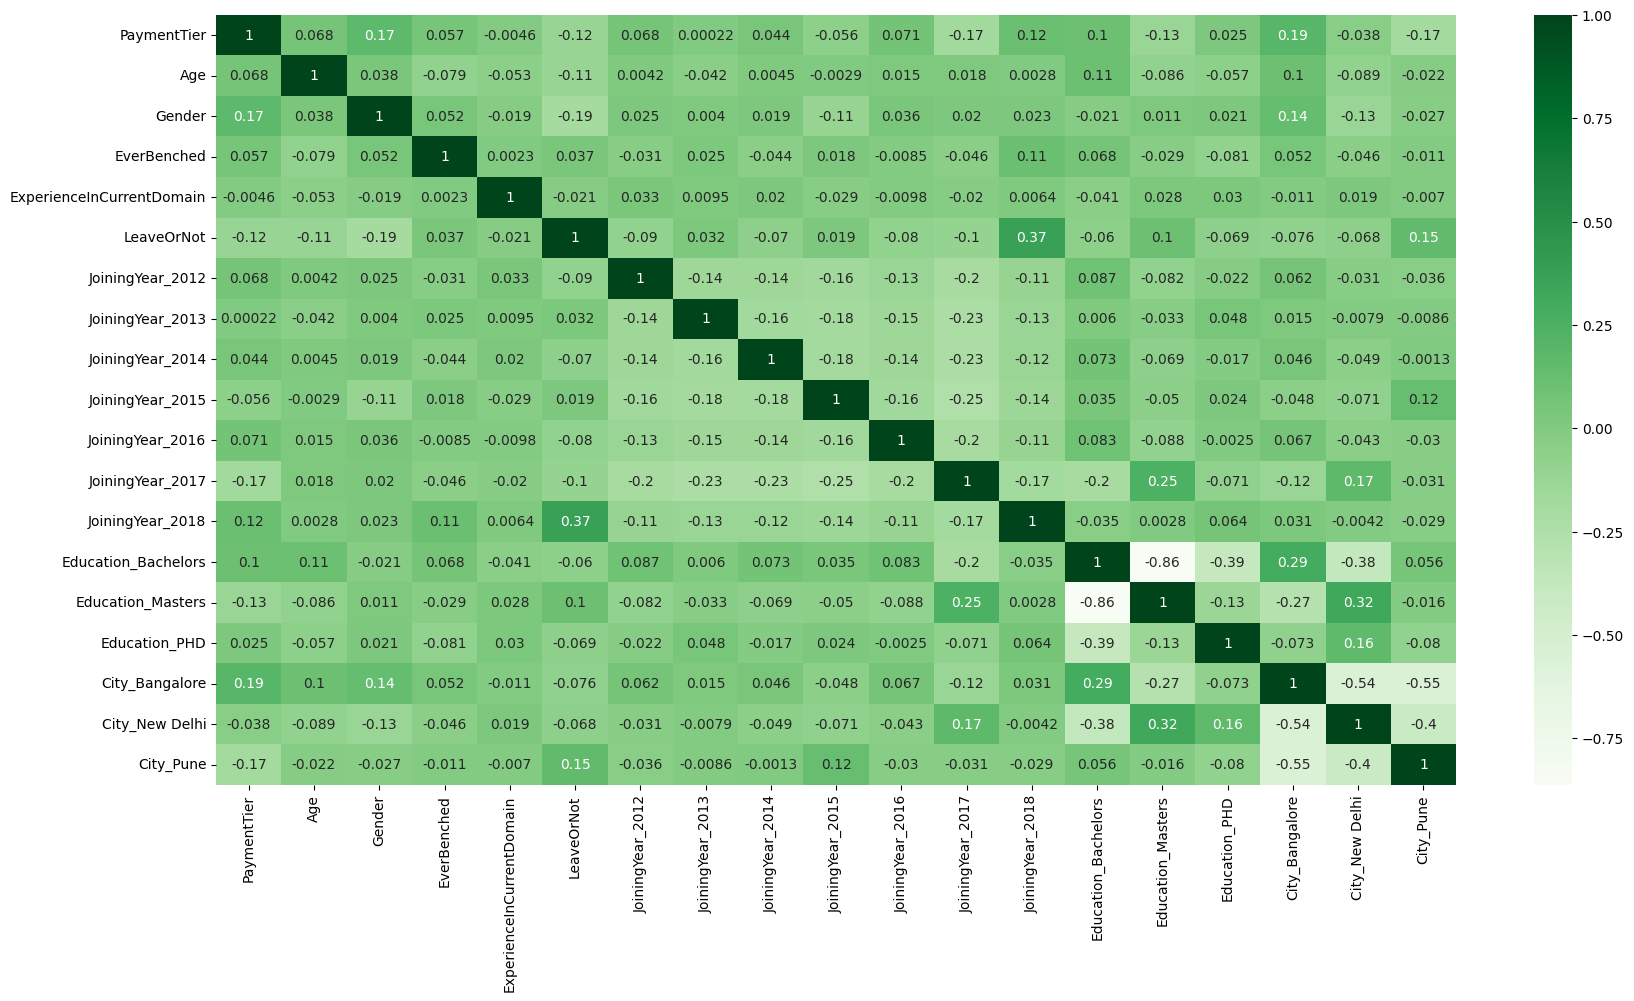

In [47]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_dummies.corr(), annot=True, cmap="Greens")

In [48]:
# # từ bản tương quan có thể thấy rằng bằng thạc sĩ hoặc cử nhân có tương quang tương đương nhau nên có thểm drop 1 trong 2
df_dummies.drop('Education_Bachelors', axis=1, inplace=True)
df_dummies.drop('City_Bangalore', axis=1, inplace=True)

df_dummies.head()

,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,JoiningYear_2012,JoiningYear_2013,JoiningYear_2014,JoiningYear_2015,JoiningYear_2016,JoiningYear_2017,JoiningYear_2018,Education_Masters,Education_PHD,City_New Delhi,City_Pune
0,3,34,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,28,0,0,3,1,0,1,0,0,0,0,0,0,0,0,1
2,3,38,0,0,2,0,0,0,1,0,0,0,0,0,0,1,0
3,3,27,1,0,5,1,0,0,0,0,1,0,0,1,0,0,0
4,3,24,1,1,2,1,0,0,0,0,0,1,0,1,0,0,1


#### Bài toán này không cần phải chuẩn hóa, nên bắt đầu tách dữ liệu để train mô hình


In [49]:
X = df_dummies.drop('LeaveOrNot', axis=1)
y = df_dummies['LeaveOrNot']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.3)

## Phần 2: Ứng dụng các mô hình học máy cơ bản để giải quyết bài toán, bao gồm cả các mô hình thuộc Ensemble Learing;

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [52]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
y_pred = model.predict(X_test)

In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       505
           1       0.63      0.61      0.62       325

    accuracy                           0.71       830
   macro avg       0.69      0.69      0.69       830
weighted avg       0.71      0.71      0.71       830



## Ứng dụng các mô hình học máy thuộc Ensemble Learing;

#### Gradient Boosting

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()

#### AdaBoost

In [56]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier()

#### Bagging

In [57]:
from sklearn.ensemble import BaggingClassifier

# Create a base classifier
base_classifier = DecisionTreeClassifier()

bagging_clf = BaggingClassifier(base_estimator=base_classifier)

#### Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()

#### Voting Classifier

In [59]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

# Create individual classifiers
gb_clf = GradientBoostingClassifier()
lr_clf = LogisticRegression()

voting_clf = VotingClassifier(
    estimators=[('rf', rf_clf), ('gb', gb_clf), ('lr', lr_clf)],
    voting='hard'
)

#### Stacking

In [66]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[('rf', rf_clf), ('gb', gb_clf)],
    final_estimator=lr_clf
)
# stacking_clf.fit(X_train, y_train)
# y_pred = stacking_clf.predict(X_test)
# print(accuracy_score(y_pred, y_test))

0.7771084337349398


#### Hàm compare_classifiers sử dụng để so sánh hiệu suất của nhiều bộ phân loại (classifiers) khác nhau dựa trên các độ đo đánh giá như accuracy (độ chính xác), precision (độ chính xác dương tính), recall (độ phục hồi), và F1-score.

c:\Python311\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


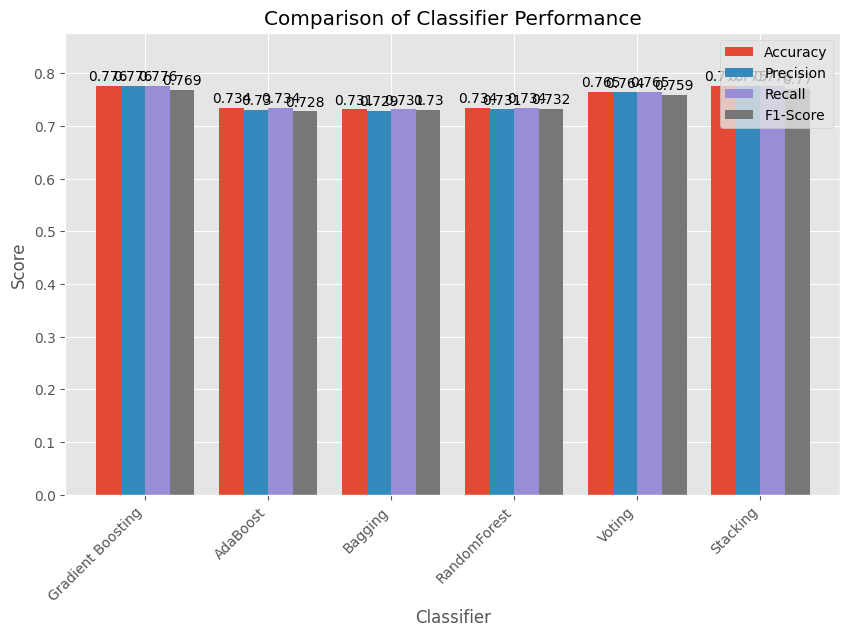

In [73]:
clf = {
    'Gradient Boosting': gb_clf,
    'AdaBoost': ada_clf,
    'Bagging': bagging_clf,
    'RandomForest': rf_clf,
    'Voting': voting_clf,
    'Stacking': stacking_clf
}


compare_classifiers(X_train, y_train, X_test, y_test, clf)